<a href="https://colab.research.google.com/github/shubhamgupta0903/Flower_data_augmentation/blob/main/Flowers_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import PIL
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 12s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [ ]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4279990882_031482f8b6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6069602140_866eecf7c2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4279989256_9a48c0d194_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2892056920_918c52889b_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5736328472_8f25e6f6e7.jpg')]

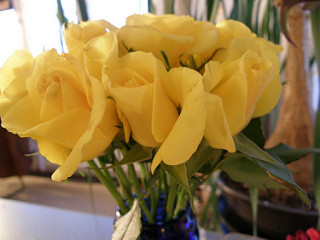

In [ ]:
PIL.Image.open(str(roses[2
                         ]))

In [ ]:
flowers_imgs_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),

}

In [ ]:
flowers_imgs_dict['roses'][0]

PosixPath('datasets/flower_photos/roses/4279990882_031482f8b6_n.jpg')

In [ ]:
# convert image to matrix
img=cv2.imread(str(flowers_imgs_dict['roses'][0]))
img

array([[[103,  92,  94],
        [ 98,  89,  92],
        [ 95,  89,  94],
        ...,
        [100,  93, 100],
        [100,  93, 100],
        [100,  92,  99]],

       [[104,  93,  95],
        [ 99,  90,  93],
        [ 95,  89,  94],
        ...,
        [100,  92, 102],
        [100,  93, 100],
        [101,  93, 100]],

       [[102,  94,  95],
        [ 98,  91,  94],
        [ 94,  90,  95],
        ...,
        [101,  93, 103],
        [101,  93, 103],
        [102,  94, 101]],

       ...,

       [[255, 252, 231],
        [255, 253, 229],
        [255, 254, 231],
        ...,
        [ 17,  27,  44],
        [ 20,  32,  38],
        [ 14,  27,  25]],

       [[253, 252, 224],
        [253, 252, 224],
        [253, 252, 226],
        ...,
        [ 18,  26,  39],
        [ 19,  24,  33],
        [ 21,  26,  35]],

       [[253, 253, 223],
        [253, 252, 224],
        [253, 252, 224],
        ...,
        [ 19,  27,  40],
        [ 21,  25,  36],
        [ 24,  29,  38]]

In [ ]:
img.shape

(250, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4

}

In [ ]:
x,y=[],[]

for flower_name ,images in flowers_imgs_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_image=cv2.resize(img,(180,180))
    x.append(resized_image)
    y.append(flowers_labels_dict[flower_name])

In [ ]:
y[:5]

[0, 0, 0, 0, 0]

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
len (x_train)

2752

In [ ]:
len(x_test)

918

In [ ]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255
x_train_scaled[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.00784314, 0.01568627, 0.03137255],
        [0.01568627, 0.05490196, 0.07843137],
        [0.00784314, 0

In [ ]:
num_classes=5
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'), #size of filters is 3 by 3
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)

])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 6s 15ms/step - loss: 1.3907 - accuracy: 0.3826
Epoch 2/30
86/86 [==============================] - 1s 16ms/step - loss: 1.0564 - accuracy: 0.5759
Epoch 3/30
86/86 [==============================] - 1s 16ms/step - loss: 0.9079 - accuracy: 0.6421
Epoch 4/30
86/86 [==============================] - 1s 15ms/step - loss: 0.7710 - accuracy: 0.6886
Epoch 5/30
86/86 [==============================] - 1s 15ms/step - loss: 0.6227 - accuracy: 0.7696
Epoch 6/30
86/86 [==============================] - 1s 16ms/step - loss: 0.4549 - accuracy: 0.8376
Epoch 7/30
86/86 [==============================] - 2s 22ms/step - loss: 0.3195 - accuracy: 0.8834
Epoch 8/30
86/86 [==============================] - 1s 15ms/step - loss: 0.2169 - accuracy: 0.9273
Epoch 9/30
86/86 [==============================] - 1s 16ms/step - loss: 0.1422 - accuracy: 0.9593
Epoch 10/30
86/86 [==============================] - 1s 15ms/step - loss: 0.0823 - accuracy: 0.9789
Epoch 11/

In [ ]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 1s 23ms/step - loss: 2.3826 - accuracy: 0.6275


[2.3826217651367188, 0.6274510025978088]

In [ ]:
# it gave good result on data fitting but on evaluation it gave only 65 % accuracy this is because there happened over fitting there....which is due to similarity of images thats why we need data augmentation.

In [ ]:
augmented_data=keras.Sequential([

    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomContrast(0.3),

])
# we can also use randomrotation.

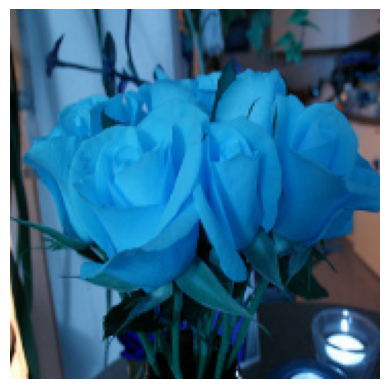

In [ ]:
plt.axis('off')
plt.imshow(x[0])

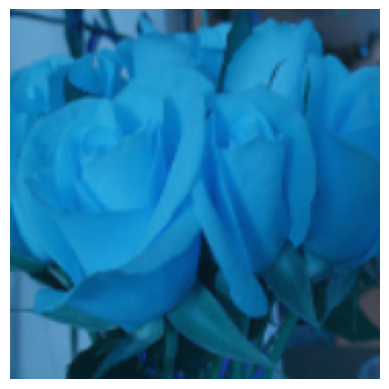

In [ ]:
plt.axis('off')
image_data = augmented_data(x)[0].numpy().astype("uint8")
plt.imshow(image_data)

In [ ]:
#contrast is also changed here with size

In [ ]:
data_augmetation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [ ]:
num_classes=5
model=Sequential([
    data_augmetation,
    layers.Conv2D(16,3,padding='same',activation='relu'), #size of filters is 3 by 3
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)

])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 5s 24ms/step - loss: 1.3405 - accuracy: 0.4084
Epoch 2/30
86/86 [==============================] - 2s 24ms/step - loss: 1.1081 - accuracy: 0.5396
Epoch 3/30
86/86 [==============================] - 2s 22ms/step - loss: 1.0204 - accuracy: 0.6050
Epoch 4/30
86/86 [==============================] - 2s 22ms/step - loss: 0.9571 - accuracy: 0.6326
Epoch 5/30
86/86 [==============================] - 2s 22ms/step - loss: 0.9014 - accuracy: 0.6537
Epoch 6/30
86/86 [==============================] - 2s 22ms/step - loss: 0.8723 - accuracy: 0.6602
Epoch 7/30
86/86 [==============================] - 2s 22ms/step - loss: 0.8358 - accuracy: 0.6762
Epoch 8/30
86/86 [==============================] - 2s 26ms/step - loss: 0.7849 - accuracy: 0.6959
Epoch 9/30
86/86 [==============================] - 2s 21ms/step - loss: 0.7614 - accuracy: 0.7078
Epoch 10/30
86/86 [==============================] - 2s 22ms/step - loss: 0.7509 - accuracy: 0.7097
Epoch 11/

In [ ]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 1s 12ms/step - loss: 0.8609 - accuracy: 0.7255


[0.8608709573745728, 0.7254902124404907]